<a href="https://colab.research.google.com/github/elsioantunes/proc-video/blob/main/procVideoLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de video LAB 1
Objetivos:


1. Iniciar os trabalhos com o Google Colab e o OpenCV $\color{#00DD00}{\text{OK}}$
2. Visualizar imagens e alterar a resolução delas $\color{#00DD00}{\text{OK}}$
3. Gravar um Vídeo e mostrá-lo no Colab $\color{#DD0000}{\text{not OK}}$






##Open image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


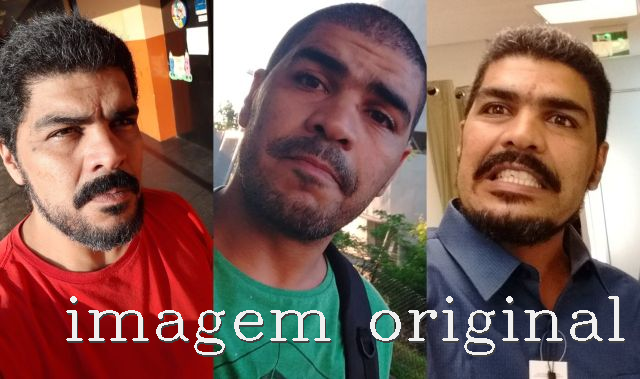

height:  379 width:  640 channels:  3


In [17]:
import numpy as np
import random
import cv2 as cv
from base64 import b64encode
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import HTML
 
#https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html
 
drive.mount('/content/drive')
img = cv.imread('/content/drive/MyDrive/((UFABC))/(proc video)/elsios.jpg')
height, width, channels = img.shape
 
myBgColor = (255, 245, 245)
 
def newEmptyImg(w=width, h=height, corRGB=myBgColor):
    b, g, r = corRGB
    emptyImg = np.zeros((h, w, 3), np.uint8)
    emptyImg[:, :] = (r, g, b)
    return emptyImg
 
def overlay(bg, img, x, y):
    h, w, _ = img.shape
    bg[y:h + y, x:w + x] = img
    return bg
 
def tableShow(m):
    hl, wl, h, w, _ = np.array(m).shape
    bg = newEmptyImg(w*wl + 5*wl+5, h*hl + 5*hl+5, myBgColor)
    for i, lin in enumerate(m):
        for j, col in enumerate(lin):
            bg = overlay(bg, col, 5 + (5 + width) * j, 5 + (5 + height) * i)
    return bg
 
def text(img, txt, w = int(width/10), h = int(9*height/10)):
    imgtmp = img.copy()
    cv.putText(imgtmp, txt, (w, h), cv.FONT_HERSHEY_COMPLEX, 2, (64, 64, 64), 2)
    cv.putText(imgtmp, txt, (w-1, h-2), cv.FONT_HERSHEY_COMPLEX, 2, (240, 240, 240), 2)
    return imgtmp
 
def show(img, title=""):
    return cv2_imshow(text(img, title))
 
nullSrc = newEmptyImg()
 
show(img, "imagem original")
print("height: ", height, "width: ", width, "channels: ", channels)

#Teste 2 - Grayscale


OpenCV fornece mecanismos de exibição de imagem em tons de cinza. Mas, acho importante ressaltar a existência e o cálculo por trás de várias técnicas. As principais: os tons de cinza gerados pela média dos valores dos canais e os tons de cinza gerados pelo máximo entre eles. 

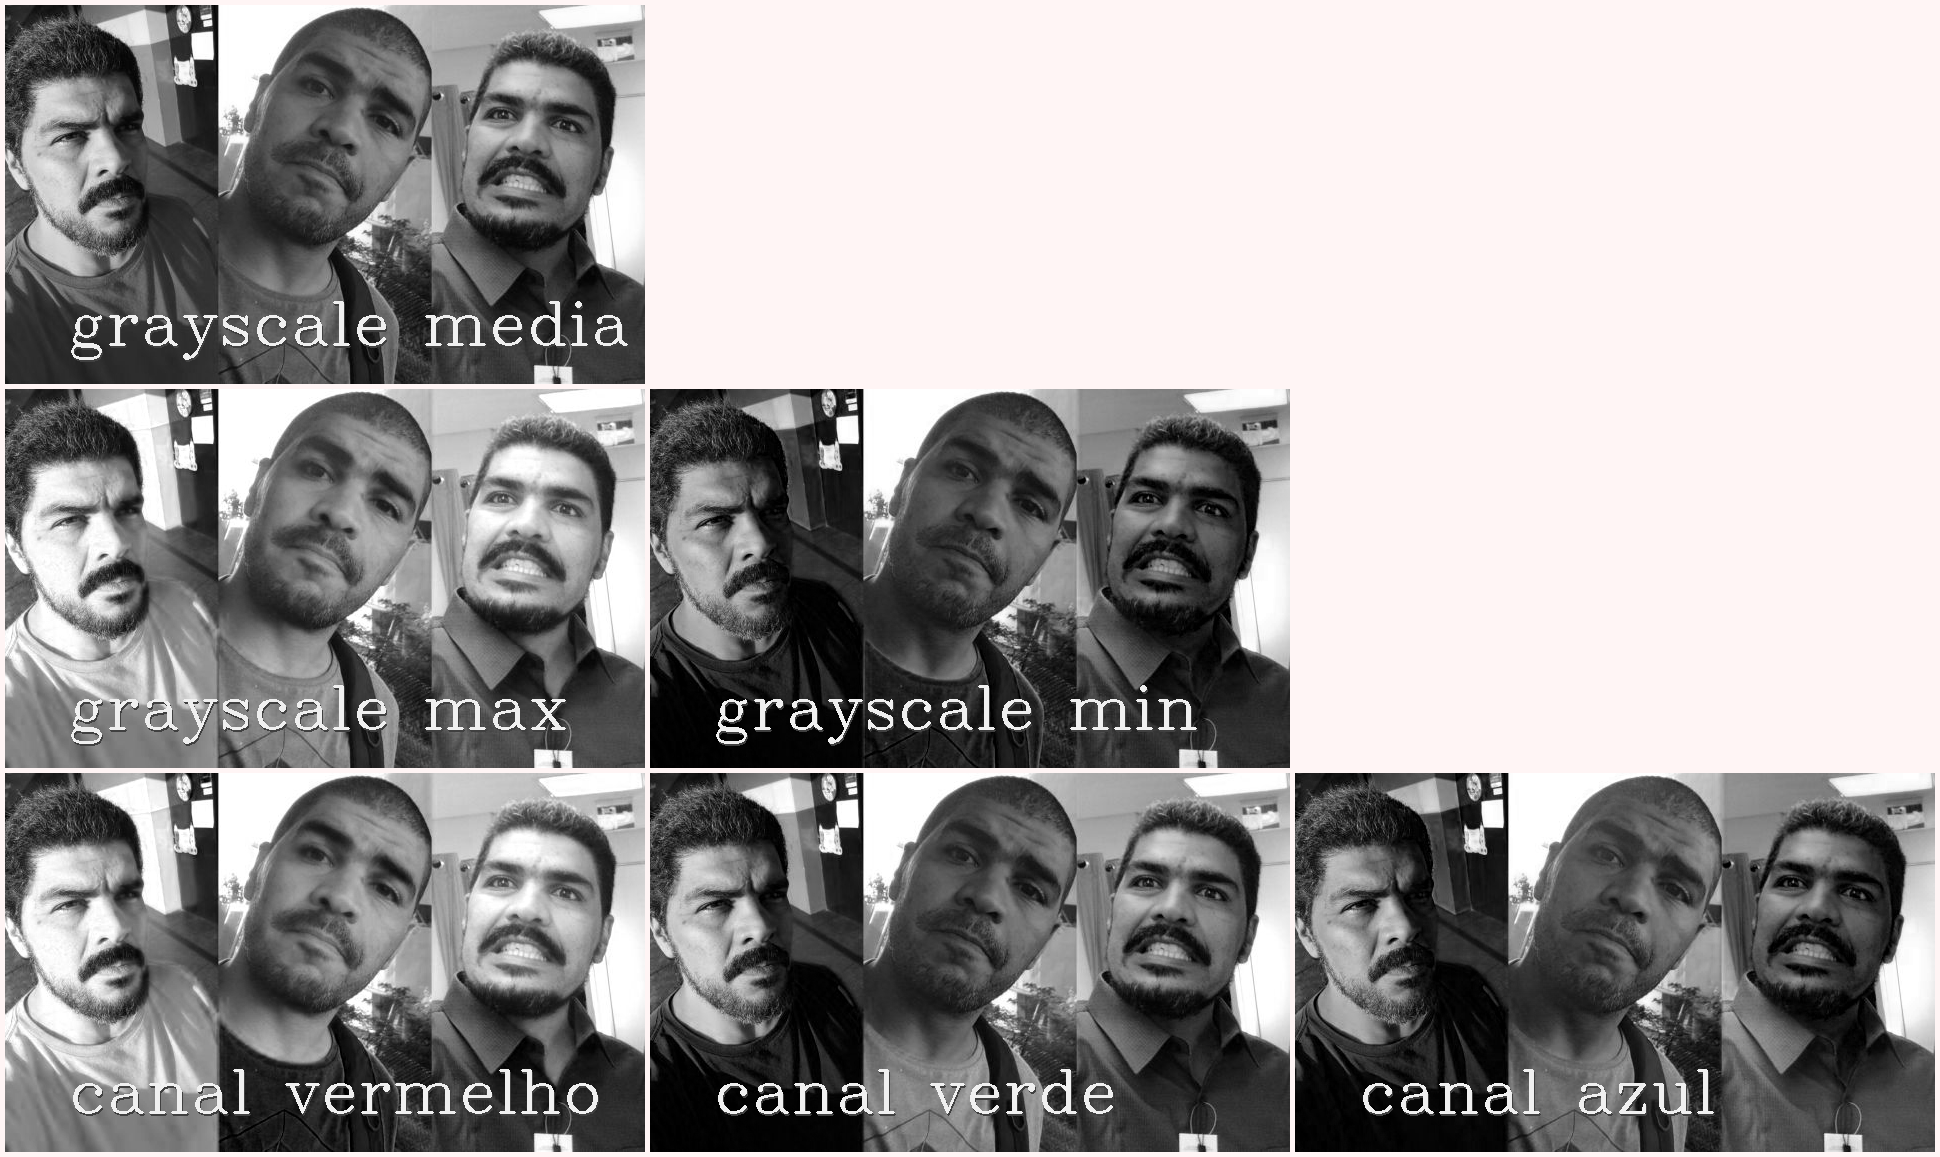

In [ ]:
(grayMean, 
grayMax, grayMin,
grayR, grayG, grayB) = [img.copy(), img.copy(), img.copy(), img.copy(), img.copy(), img.copy()]

for i, lin in enumerate(img):
    for j, pix in enumerate(lin):
        grayMean[i][j] = pix.sum()/3
        grayMax[i][j] = pix.max()
        grayMin[i][j] = pix.min()
        grayR[i][j] = pix[2]
        grayG[i][j] = pix[1]
        grayB[i][j] = pix[0]

show(tableShow(
    [
     [text(grayMean, "grayscale media"), nullSrc, nullSrc], 
     [text(grayMax, "grayscale max"), text(grayMin, "grayscale min"), nullSrc], 
     [text(grayR, "canal vermelho"), text(grayG, "canal verde"), text(grayB, "canal azul")], 
    ]))

Repare que
Na imagem com os tons de cinza baseada em média, as camisetas parecem ser da mesma tonalidade (a média entre elas); Na imagem com tons baseada em máximo, a iluminação é privilegiada; Na baseada em mínimos, os traços de pele negra ficam ressaltados, mesmo o modelo sendo pardo; Na baseada em vermelhos a camiseta parece ser branca, pois o vermelho dela é puro em contraste com a camiseta azul e a verde, que eram misturas.

Cada uma dessas técnicas de converção para grayscale (dentre outras) pode ser usada a depender do que se quer destacar na imagem.

#Teste 3 - Resize


OpenCV fornece mecanismos de exibição de imagem em diferentes resoluções e, dado que o python interpretado pelo colab não é adequado para grandes quantidades de cálculo, convém utilizar otimizações nos algoritmos implementados em openCV


simplesmente reduzindo proporcionalmente largura e altura originais em 50%


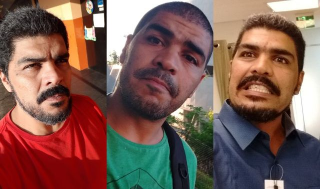

In [ ]:
imgRes1 = cv.resize(img, (int(width/2), int(height/2))) 
print ("simplesmente reduzindo proporcionalmente largura e altura originais em 50%")
show(imgRes1)

Atento ao fato que a nova resolução deve ser uma tupla de inteiros.
Desta forma, podemos inclusive escolher valores que não respeitem a razão do aspecto da imagem (aspectratio).

Reduzindo a imagem de forma não proporcional


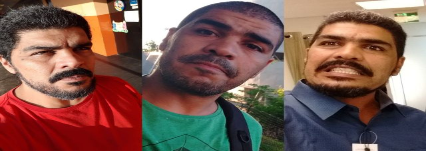

In [ ]:
imgRes2 = cv.resize(img, (int(2*width/3), int(2*height/5))) 
print ("Reduzindo a imagem de forma não proporcional")
show(imgRes2)

Métodos de interpolação durante o redimensinoamento determinam a forma de como obter imagens maiores a partir da informação contida na imagem original. Geralmente utiliza-se polinômios ou outros métodos de regressão matemática que, teoricamente, interferem no tempo de execussão do código. Infelizmente, os testes dos diferentes parâmetros da função nesta plataforma não resultou em nenhuma diferença perceptível de tempo e de qualidade visual. 

teste de métodos de interpolação e tempo de execução


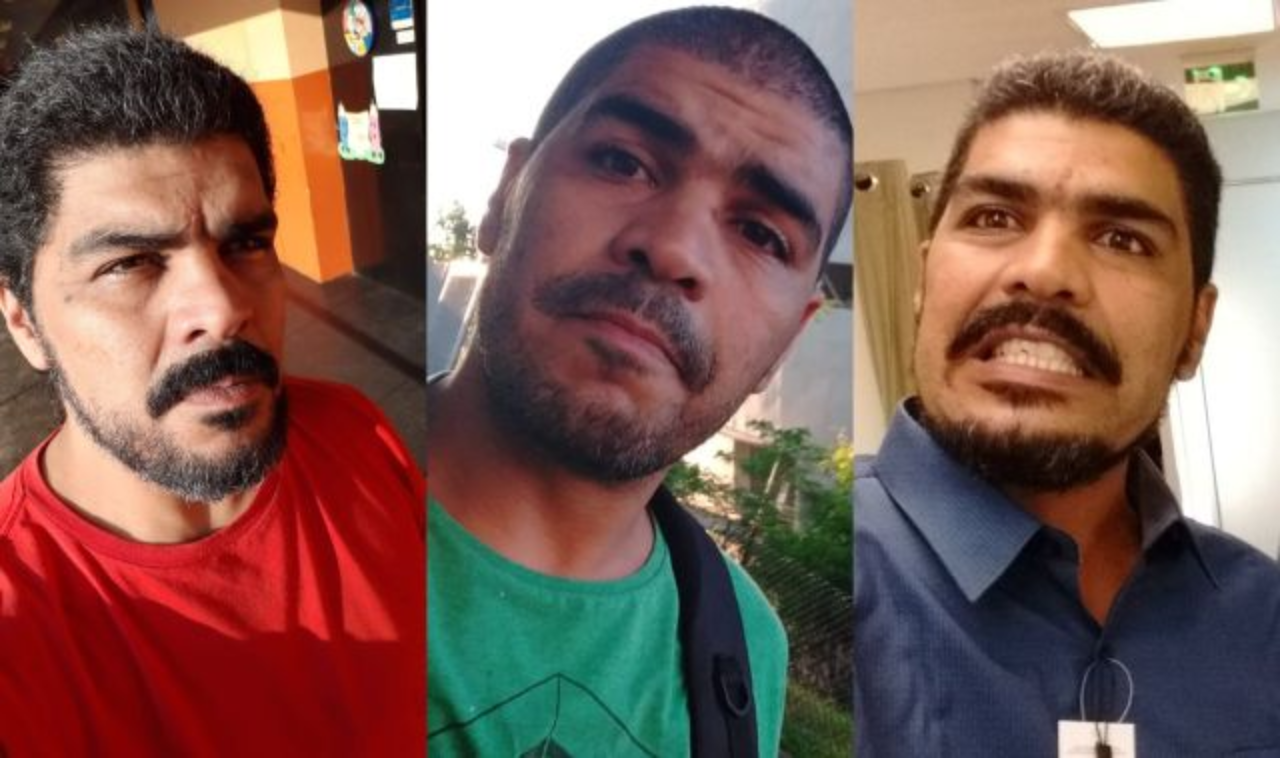

In [ ]:
imgRes3 = cv.resize(img, (int(width*2), int(height*2)), cv.INTER_NEAREST) 
print ("teste de métodos de interpolação e tempo de execução")
show(imgRes3)

#Teste 4 - Videos



## Exibição em HTML
Edições de video costumam consumir muitos recursos. Esta talvez não seja a melhor plataforma para obtenção de produção e efeitos em tempo real. Mas, nos esforçaremos para obter ao menos os resultados teóricos.


In [ ]:
video = open('/content/drive/MyDrive/((UFABC))/(proc video)/elsioMini.mp4', 'rb').read()
vidDec = "data:video/mp4;base64," + b64encode(video).decode()
HTML(f'<video width=180 controls><source src= {vidDec} type="video/mp4"></video>')


## Captura de video pelo colab


Para ter acesso aos frames do video, precisamos fazer uma captura, neste caso, do video elsioMini.mp4 e gravaremos as modificações em teste1.mp4


In [77]:
cap = cv.VideoCapture('/content/drive/MyDrive/((UFABC))/(proc video)/elsioMini.mp4')
ret, frame = cap.read()
vheight, vwidth, vc = frame.shape
fps = cap.get(cv.CAP_PROP_FPS)
print(cap.get(cv.CAP_PROP_FRAME_COUNT))

'''
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
vheight, vwidth, vc = 320, 200, 666
'''    
 
print (vwidth, vheight)
neww, newh = int(vwidth/2), int(vheight/2)

fourcc = cv.VideoWriter_fourcc(*'MP4V')
saida = cv.VideoWriter('/content/drive/MyDrive/((UFABC))/(proc video)/teste7.mp4', fourcc, 25, (neww, newh))
 
x = 0
while True:
    ret, frame = cap.read()
    if ret and x < 450:
        x = x + 1 # limitando numero de frames. video mt longo
 
        newframe = cv.resize(frame, (neww, newh), interpolation = cv.INTER_CUBIC)
        #newframe = cv.flip(frame, 1)
        saida.write(newframe)
 
        #show(newframe) # exibir é demorado
 
    else:
        break
 

cap.release()
saida.release()

899.0
322 156


# CONCLUSÃO
Infelizmente, não conseguimos exibir o video gerado nem acessar camera para captura em tempo real. Mas o video com a modificação de resolução foi gerado e está no drive. Vou enviar este código como está, mas ele continuará sendo atualizado e poderá ser visto na página do github: https://elsioantunes.github.io/proc-video/


In [86]:
video = open('/content/drive/MyDrive/((UFABC))/(proc video)/elsioMini.mp4', 'rb').read()
vidDec = "data:video/mp4;base64," + b64encode(video).decode()
#vidDec = '/content/drive/MyDrive/((UFABC))/(proc video)/elsioMini.mp4'
HTML(f'<video width={vwidth} controls><source src= "{vidDec}" type="video/mp4"></video>')

# teste


talvez a interação python/js seja a resposta para os problemas encontrados: acesso à camera e exibição do video gerado


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
 
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
 
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
 
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
 
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
 
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
 
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'